<a href="https://colab.research.google.com/github/johhan27/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/LS_DS_131_Simple_Linear_Regression_Assignment_ANSWERS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Autograded Notebook (Canvas & CodeGrade)

This notebook will be automatically graded. It is designed to test your answers and award points for the correct answers. Following the instructions for each Task carefully.

### Instructions

* **Download this notebook** as you would any other ipynb file
* **Upload** to Google Colab or work locally (if you have that set-up)
* **Delete `raise NotImplementedError()`**
* Write your code in the `# YOUR CODE HERE` space
* **Execute** the Test cells that contain `assert` statements - these help you check your work (others contain hidden tests that will be checked when you submit through Canvas)
* **Save** your notebook when you are finished
* **Download** as a `ipynb` file (if working in Colab)
* **Upload** your complete notebook to Canvas (there will be additional instructions in Slack and/or Canvas)

# Lambda School Data Science - Unit 1 Sprint 3 Module 1

---

## Module Project: Simple Linear Regression


### Learning Objectives 

- identify the independent and dependent variables in a relationship (also known as features and target, and explanatory and response variables)
- identify linear and nonlinear relationships from a scatterplot
- calculate and interpret linear correlation
- calculate and interpret the slope and intercept of a simple linear regression model
- predict a response from a simple linear regression model
- calculate and interpret a residual

### Total notebook points: 11

## Part A

## Introduction

### Is head size related to brain weight in healthy adult humans?

The `Brainhead.csv` dataset provides information on 237 individuals who were subject to post-mortem examination at the Middlesex Hospital in London around the turn of the 20th century. Study authors used cadavers to see if a relationship between brain weight and other more easily measured physiological characteristics such as age, sex, and head size could be determined. The end goal was to develop a way to estimate a person’s brain size while they were still alive (as the living aren’t keen on having their brains taken out and weighed). 

**We wish to determine if there is a linear relationship between head size and brain weight in healthy human adults.**

(Source: R.J. Gladstone (1905). "A Study of the Relations of the Brain to the Size of the Head", Biometrika, Vol. 4, pp105-123.)

Use the above information to complete Tasks 1 - 13

**Task 1** - Load the data

As we usually begin, let's load the data! The URL has been provided.

* load your CSV file into a DataFrame named `df`

In [ ]:
# Task 1

# Imports
import pandas as pd
import numpy as np

data_url = 'https://raw.githubusercontent.com/LambdaSchool/data-science-practice-datasets/main/unit_1/Brainhead/Brainhead.csv'

# YOUR CODE HERE
df = pd.read_csv(data_url)


# Print out your DataFrame
df.head()

,Gender,Age,Head,Brain
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


**Task 1 - Test**

In [ ]:
# Task 1 - Test

assert isinstance(df, pd.DataFrame), 'Have you created a DataFrame named `df`?'
assert len(df) == 237


**Task 2**

The two variables we are interested in - for now - are 

* `Brain` - the brain weight in kg
* `Head` - the head size in cubic cm

If we wish to predict brain weight from head size, which variable is the **independent variable** (also called the feature, explanatory, or x variable) and which variable is the **dependent variable** (also called the target, response or y variable)?

Using the DataFrame `df` you loaded above assign columns to the independent and dependent variables

* Assign the DataFrame column of the independent variable to `ind_x`
* Assign the DataFrame column of dependent variable to `dep_y`

In [ ]:
df.isna().sum().sum()

0

In [ ]:
# Task 2

# YOUR CODE HERE
ind_x = df['Head']
dep_y = df['Brain']
print (ind_x, dep_y)

0      4512
1      3738
2      4261
3      3777
4      4177
       ... 
232    3214
233    3394
234    3233
235    3352
236    3391
Name: Head, Length: 237, dtype: int64 0      1530
1      1297
2      1335
3      1282
4      1590
       ... 
232    1110
233    1215
234    1104
235    1170
236    1120
Name: Brain, Length: 237, dtype: int64


**Task 2 - Test**

In [ ]:
# Task 2 - Test
# Hidden tests - you will see the results when you submit to Canvas

**Task 3** - Create a plot

This task will not be autograded - but it is part of the project!

Create a scatterplot showing the relationship between brain weight and head size.  Make sure to plot the correct variable on the correct axis and label your axes.

* Import your plotting library
* Plot your x- and y-variables on a scatter plot
* Label the axes
* Give your plot a title!

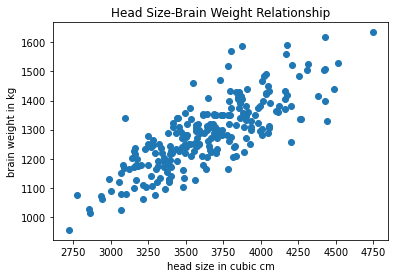

Big and Heavy Brains here


In [ ]:
# Task 3
# (NOT autograded but fill in your code!)
# YOUR CODE HERE
import matplotlib.pyplot as plt

plt.scatter(x=ind_x, y=dep_y)
plt.xlabel('head size in cubic cm')
plt.ylabel('brain weight in kg')
plt.title('Head Size-Brain Weight Relationship')
plt.show()

print ('Big and Heavy Brains here')

**Task 4** - Describe your plot

Describe the *strength* and *direction* of the relationship between head size and brain weight.

This task will not be autograded - but it is part of the project!

**Task 4** - ANSWER

There's a positive correlation: The greater the head size the heavier the brain. 

**Task 5** - Missing data

Now, let's determine if there is any missing data in the dataset. If there are null values, drop the row that contains a missing value(s).

* Check for missing/null values and assign the sum to `num_null` - the result should be the sum of **all** the null values and a **single integer** (*Hint: you will compute the sum of a sum*)
* If there are null values, drop them in place (your DataFrame should still be (`df`)

In [ ]:
# Task 5

# YOUR CODE HERE
num_null = df.isnull().sum().sum()

**Task 5 - Test**

In [ ]:
# Task 5 - Test
# Hidden tests - you will see the results when you submit to Canvas

**Task 6** - Correlation coefficient

Now that's we've explored our data through a plot and checked for null values, we can move on to some calculations. First, we're going to calculate and interpret the correlation coefficient for the relationship between *head size* and *brain weight*.

* Import numpy as np
* Calculate the correlation coefficient and assign it to the variable `corr_coef`. Your output should be a 2x2 numpy array (`numpy.ndarray`) with the value of `1` along the diagonal.

In [ ]:
ind_x

0      4512
1      3738
2      4261
3      3777
4      4177
       ... 
232    3214
233    3394
234    3233
235    3352
236    3391
Name: Head, Length: 237, dtype: int64

In [ ]:
import numpy as np
from scipy.stats import pearsonr

In [ ]:
# Task 6

# YOUR CODE HERE
corr_coef = np.corrcoef(ind_x, dep_y)
# View the results
print('Correlation coefficient:', corr_coef)

Correlation coefficient: [[1.         0.79956971]
 [0.79956971 1.        ]]


**Task 6 - Test**

In [ ]:
# Task 6 - Test

assert isinstance(corr_coef, np.ndarray), 'Your correlation coefficient calculation should return a numpy array.'

**Task 6** - Correlation coefficient written answer

Comment on the correlation coefficient value: Does the value align with your above plot? Is it a strong correlation or a weak correlation? In what direction? Your answer is not autograded but it is required for a complete project.

***The value aligns with the plot and shows an almost strong POSITIVE correlation between Head Size and Brain Weight***

**Task 7** - Correlation coefficient, part 2

**Without** doing any other calculations, determine the correlation of *brain weight* with *head size*.

* Assign your result to `corr_coef_2`; this value should be a float.

In [ ]:
# Task 7

# YOUR CODE HERE
corr_coef_2 = corr_coef[1][0] #this is the linear correlation (r) vs the 1, -1 
# View the results
print('Correlation coefficient, part 2:', corr_coef_2)

Correlation coefficient, part 2: 0.7995697092542962


**Task 7 - Test**

In [ ]:
# Task 7 - Test

# Hidden tests - you will see the results when you submit to Canvas

**Task 8** - Linear model

Now that we've calculated the correlation coefficient, we going to fit a linear model to our two variables. We'll use the `statsmodels` to calculate the least-squares regression coefficients (slope and intercept). Our two variables are head size (`Head`) and brain weight (`Brain`).

* The import statement has been provided (don't edit this)
* Create and fit your model in one step; assign it to `model` (*Hint: remember the format of the input data is `Y ~ X`*)
* Using the `model.params[1]` method, assign the slope to the variable `slope`. Your variable should be a float (`numpy.float64`).
* Using the same `model.params[0]` method, assign the intercept to the variable `intercept`. Your variable should be a float (`numpy.float64`).

In [ ]:
# Task 8

# Import OLS from statsmodel
from statsmodels.formula.api import ols

# Set-up and fit the model in one step
# (format Y ~ X)

# YOUR CODE HERE
model = ols('Brain ~ Head', df).fit()
slope = model.params[1]
intercept = model.params[0]


# View the model parameters
print('The slope is:', slope)
print('The intercept is:', intercept)

The slope is: 0.263429339489399
The intercept is: 325.5734210494421


**Task 8 - Test**

In [ ]:
# Task 8 - Test

# Hidden tests - you will see the results when you submit to Canvas

**Task 9** - Writing the linear equation

Use the model output above to write the linear model relating head size to brain weight. Fill in the *b* terms in the following equation with the correct numbers from above. Your answer is not autograded but it is required for a complete project.

$$\hat{Y} = 325.57 + 0.26X$$

**Task  10** - Interpreting the equation

Answer the following questions about the slope and intercept parameters. Your answer is not autograded but it is required for a complete project.

10a - What does the slope term tell us about the relationship between head size and brain weight? Make sure to include the units of the variables in your answer!

10b - What does the intercept tell us about the relationship between head size and brain weight? *Hint: Think about what a negative intercept means in terms of weight and size - can you have a negative weight?*

---

10a: The slope tells us that for every 1-unit change in the head size (cubic cm) the Brain weight (Kg) will change 0.26x in the same direction

10b: In this case the intercept represents the minimun limit weight of a brain, since we can't have negative values for head size nor the brain weight.

**Task 11** - Scatterplot with regression line

Create a scatterplot with the regression line overlayed on top of the data. You can do this either with the seaborn plotting library or with matplotlib.

**Tips**

* If you use seaborn, turn off the confidence interval plotting (`ci=None`).
* If you use matplotlib, you'll have to generate the data for the line using the equation you wrote in Task 9

Write your plotting code below. Your plot will not be autograded but it is required for a complete project!

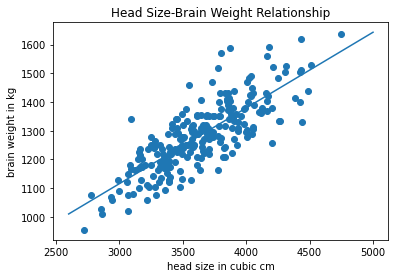

Big and Heavy Brains here


In [ ]:
# Task 11

# Plotting code here; not autograde3d
# YOUR CODE HERE

x= np.linspace(2600, 5000, 50)
y = intercept + slope*x

plt.scatter(x=ind_x, y=dep_y)
plt.xlabel('head size in cubic cm')
plt.ylabel('brain weight in kg')
plt.title('Head Size-Brain Weight Relationship')
plt.plot(x, y)
plt.show()

print ('Big and Heavy Brains here')

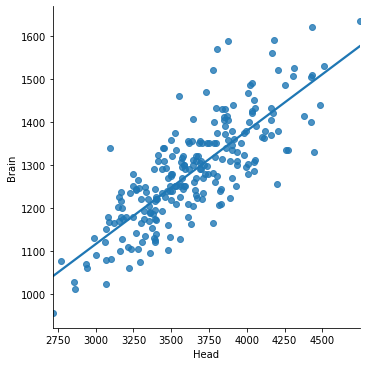

In [ ]:
import seaborn as sns

sns.lmplot(x = 'Head', y = 'Brain',  data= df, ci = None, fit_reg = True)

**Task 12** - Making a prediction

We're going to use our model to make a prediction. A healthy human has a brain size of 4100 cubic cm. How much do we expect his or her brain to weigh?

* Assign the value 4100 to the variable `x_healthy` (it is an integer).
* Using your `slope` and `intercept` values, determine the weight of a brain of size `x_healthy`; assign this value to `predict_healthy` and it should be a float.


In [ ]:
# Task 12

# YOUR CODE HERE
x_healthy = 4100
predict_healthy = intercept + slope*x_healthy

# View your prediction

print('Prediction for a brain size of 4100 cc:', predict_healthy)

Prediction for a brain size of 4100 cc: 1405.633712955978


**Task 12 - Test**

In [ ]:
# Task 12 - Test

assert x_healthy == 4100, "Make sure to correct set your x variable."

**Task 13** - Calculating a residual

Now that we've made a prediction, we can take a look at a *model residual*. For this task, you will calculate and interpret the model residual for the first observation in the dataset. Remember that the first observation in the dataset is `Head`=4512 cubic centimeters.

* Assign the value of 4512 to the variable `x_first` (it is an integer)
* Assign the value of the first observation for `Brain` to the variable `observed_first` (*it is your job to look-up this value in your DataFrame; it should be an integer)
* Calculate the predicted value and assign it to the variable `predict_first` (this variable should be a float).
* Calculate the residual and assign it to the variable `residual_first` (*Hint: use the equation observed - predicted*. Your result will be float).

In [ ]:
# Task 13

# YOUR CODE HERE
x_first = 4512
observed_first = df.loc[df['Head']==x_first]['Brain'][0]
predict_first = intercept + slope*x_first
residual_first = observed_first-predict_first
# View your prediction and residual 
print ("observed", observed_first)
print('Prediction for a brain size of 4512 cc:', predict_first)
print('Residual for the prediction:', residual_first)

observed 1530
Prediction for a brain size of 4512 cc: 1514.1666008256107
Residual for the prediction: 15.833399174389342


**Task 13 - Test**

In [ ]:
# Task 13 - Test

assert x_first == 4512, "Make sure to correct set your x variable."

## Part B

### Sleep Data

Use the following information to answer Tasks 14 - 16 in the rest of this project:

Researchers recorded data on sleep duration as well as a set of ecological and constitutional variables for a selection of mammal species. This data is available in the Sleep.csv dataset; the URL is provided below. 

(*Source: Allison, T. and Cicchetti, D. (1976), "Sleep in Mammals: Ecological and Constitutional Correlates",  Science, November 12, vol. 194, pp. 732-734.*)

**Data Dictionary:**

| Variable Name |            Description           |                                                                 Details                                                                 |              |   |
|:-------------:|:--------------------------------:|:---------------------------------------------------------------------------------------------------------------------------------------:|--------------|---|
| Animal        |            Animal name           |                                                            Character [string]                                                           |    |   |
| Body          |            Body weight           |                                                               Numeric [kg]                                                              |       |   |
| Brain         |           Brain weight           |                                                               Numeric [g]                                                               |  |   |
| SWsleep       | Slow wave (“non-dreaming”) sleep | Numeric [hours]                                                                                                                         |              |   |
| Parasleep     | Paradoxical (“dreaming”) sleep   | Numeric [hours]                                                                                                                         |              |   |
| Totsleep      | Total sleep                      | Numeric [hours]                                                                                                                         |              |   |
| Life          | Maximum life expectancy          | Numeric [years]                                                                                                                         |              |   |
| Gest          | Gestation time                   | Numeric [days]                                                                                                                          |              |   |
| Pred          | Predation index                  | Numeric [1 – 5] 1 = least likely to be preyed upon, 5 = most likely to be preyed upon                                                   |              |   |
| Exposure      | Sleep exposure index             | Numeric [1 – 5] 1 = least amount of exposure during sleep (mammal sleeps indoors or in a den), 5 = most amount of exposure during sleep |              |   |
| Danger        | Overall danger index             | Numeric [ 1 – 5] 1 = least amount of danger from other animals, 5 = most amount of danger from other animals                            |              |   |



**Task 14**

Before we can look at the data, we need to load in the data. The URL has been provided.

* Load in the CSV file as a DataFrame and assign it to the variable `df_sleep`.
* Make sure to view the DataFrame!

In [ ]:
# Task 14

# Dataset URL
data_url_2 = 'https://raw.githubusercontent.com/LambdaSchool/data-science-practice-datasets/main/unit_1/Sleep/Sleep.csv'

# YOUR CODE HERE
df_sleep = pd.read_csv(data_url_2)

# Print out your DataFrame
df_sleep.head()

,Animal,Body,Brain,SWsleep,Parasleep,Totsleep,Life,Gest,Pred,Exposure,Danger
0,African_giant_pouched_rat,1.000,6.6,6.3,2.0,8.3,4.5,42.0,3,1,3
1,Asian_elephant,2547.000,4603.0,2.1,1.8,3.9,69.0,624.0,3,5,4
2,Baboon,10.550,179.5,9.1,0.7,9.8,27.0,180.0,4,4,4
3,Big_brown_bat,0.023,0.3,15.8,3.9,19.7,19.0,35.0,1,1,1
4,Brazilian_tapir,160.000,169.0,5.2,1.0,6.2,30.4,392.0,4,5,4


**Task 14 - Test**

In [ ]:
# Task 14 - Test

assert isinstance(df_sleep, pd.DataFrame), 'Have you created a DataFrame named `df_sleep`?'
assert len(df_sleep) == 42


**Task 15**

Write a function that replaces the `_` character in each animal name with a space.  For example,  Asian_elephant = Asian elephant.

Hint: use the `string.replace()` string method. Look up the documentation or the Canvas material to help.

* Write your function and define it with the name `name_nospace`. It should return a string.
* Use your function to add an additional column to the `df_sleep` DataFrame; this new column should be named `Animal_name`. (*Hint: consider using the `.apply()` method on your DataFrame*)

In [ ]:
def my_name_nospace(name):
  output=''
  separated = name.split('_')
  for word in separated:
    output = output+" "+word
  return output

print (my_name_nospace('African_giant_pouched_rat')) 


 African giant pouched rat


In [ ]:
def name_nospace(name):
  return name.replace("_", " ")
print (name_nospace('African_giant_pouched_rat'))

African giant pouched rat


In [ ]:
# Task 15

# Write your function here

# YOUR CODE HERE

df_sleep['Animal_name'] = df_sleep['Animal'].apply(name_nospace)

# View your DataFrame
df_sleep.head()

,Animal,Body,Brain,SWsleep,Parasleep,Totsleep,Life,Gest,Pred,Exposure,Danger,Animal_name
0,African_giant_pouched_rat,1.000,6.6,6.3,2.0,8.3,4.5,42.0,3,1,3,African giant pouched rat
1,Asian_elephant,2547.000,4603.0,2.1,1.8,3.9,69.0,624.0,3,5,4,Asian elephant
2,Baboon,10.550,179.5,9.1,0.7,9.8,27.0,180.0,4,4,4,Baboon
3,Big_brown_bat,0.023,0.3,15.8,3.9,19.7,19.0,35.0,1,1,1,Big brown bat
4,Brazilian_tapir,160.000,169.0,5.2,1.0,6.2,30.4,392.0,4,5,4,Brazilian tapir


**Task 15 - Test**

In [ ]:
# Task 15 - Test

assert name_nospace('Test_name') == 'Test name', 'Double check your function and that it returns the correct name.'


**Task 15** - Plotting relationships

For this task, you will plot the relationships between three different variables: life expectancy, total sleep, and gestation time. We want to look at pairs of relationships, so we'll make use of the seaborn pairplot

* Use `sns.pairplot` to plot these three variables

This task will not be autograded - but it is part of the project!

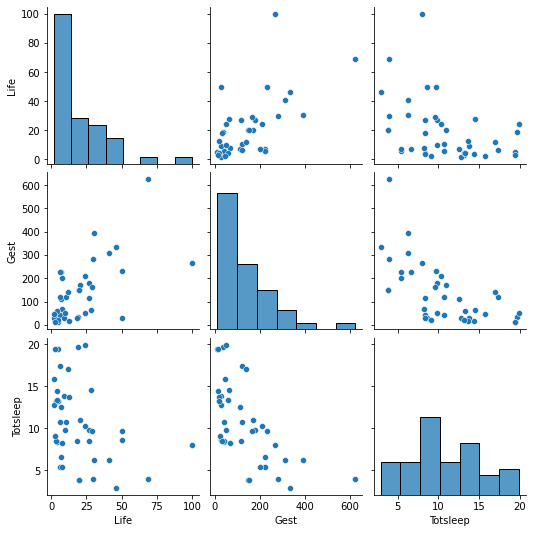

In [ ]:
# Task 15

# Plotting code here; not autograde3d
# YOUR CODE HERE
sns.pairplot(df_sleep[['Life', 'Gest', 'Totsleep']])

**Task 16** - Correlation calculations

On this final graded task, we're going to complete two more correlation calculations.

* Calculate the correlation between life expectancy and total sleep - assign your result to `corr_life_sleep`. Your number should be a float.
* Calculate the correlation between gestation time and total sleep - assign your result to `corr_gest_sleep`. Your number should be a float.

In [ ]:
# Task 16

# YOUR CODE HERE
corr_life_sleep = np.corrcoef(df_sleep['Life'], df_sleep['Totsleep'])
corr_gest_sleep = np.corrcoef(df_sleep['Gest'], df_sleep['Totsleep'])
print (corr_life_sleep, corr_gest_sleep)
print("Correlation between total sleep and life expectancy=", corr_life_sleep[0,1])
print("Correlation between total sleep and gestation time=", corr_gest_sleep[0,1])

[[ 1.         -0.38244618]
 [-0.38244618  1.        ]] [[ 1.         -0.61447431]
 [-0.61447431  1.        ]]
Correlation between total sleep and life expectancy= -0.3824461769490717
Correlation between total sleep and gestation time= -0.6144743061371066


**Task 16 - Test**

In [ ]:
# Task 16 - Test

# Hidden tests - you will see the results when you submit to Canvas
